<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [45]:
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.formula.api as sm
%pylab inline

np.random.seed(100)

Populating the interactive namespace from numpy and matplotlib


In [46]:
def linefunc(x, a=1, b=0):
    '''
    Produce a line
    '''    
    
    #define the line
    y = a * x + b
    
    #create some noise
    yerr = np.random.randn(len(x)) * np.sqrt(y.mean())
    
    return y + yerr 

Use Poisson distribution for noise. $\lambda$ is the mean and the standard deviation is $\sqrt{\lambda}$. So we only need to know $\lambda$.

In [47]:
x = np.random.rand(20) * 10
line = linefunc(x, a=1.5 , b=10)

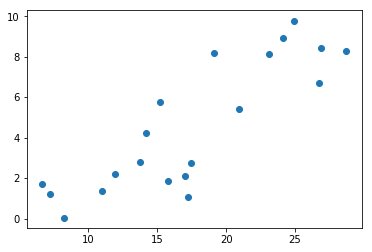

In [48]:
pl.scatter(line, x);

In [49]:
df_ = pd.DataFrame({'y':line, 'x':x})

In [50]:
lineModel = sm.ols('y ~ x', data=df_).fit()

In [51]:
lineModel.params

Intercept    9.425574
x            1.777886
dtype: float64

In [52]:
df_

,x,y
0,5.434049,20.909982
1,2.783694,13.747338
2,4.245176,14.188920
3,8.447761,26.894698
4,0.047189,8.273937
5,1.215691,7.237181
6,6.707491,26.700872
7,8.258528,28.710097
8,1.367066,11.017613
9,5.750933,15.171471


In [53]:
lineModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     45.98
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           2.37e-06
Time:                        19:35:13   Log-Likelihood:                -53.278
No. Observations:                  20   AIC:                             110.6
Df Residuals:                      18   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4256      1.446      6.519      0.000       6.388      12.463
x              1.7779      0.262      6.781      0.000       1.227       2.329
==============================================================================
Omnibus:                        2.282   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.105
Skew:                           0.087   Prob(JB):                        0.576
Kurtosis:                       1.862   Cond. No.                         9.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
quadraticModel = sm.ols('y ~ x + I(x**2)', data=df_).fit()

In [55]:
quadraticModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     21.94
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           1.96e-05
Time:                        19:35:14   Log-Likelihood:                -53.205
No. Observations:                  20   AIC:                             112.4
Df Residuals:                      17   BIC:                             115.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7584      2.401      3.647      0.002       3.692      13.825
x              2.2292      1.306      1.707      0.106      -0.526       4.984
I(x ** 2)     -0.0455      0.129     -0.353      0.728      -0.317       0.226
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                0.963
Skew:                           0.054   Prob(JB):                        0.618
Kurtosis:                       1.931   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
df2_ = pd.DataFrame({'y':line, 'x':x, 'x2': x**2})

In [57]:
quadraticModel = sm.ols('y ~ x + x2', data=df2_).fit()

In [58]:
quadraticModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     21.94
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           1.96e-05
Time:                        19:35:16   Log-Likelihood:                -53.205
No. Observations:                  20   AIC:                             112.4
Df Residuals:                      17   BIC:                             115.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7584      2.401      3.647      0.002       3.692      13.825
x              2.2292      1.306      1.707      0.106      -0.526       4.984
x2            -0.0455      0.129     -0.353      0.728      -0.317       0.226
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                0.963
Skew:                           0.054   Prob(JB):                        0.618
Kurtosis:                       1.931   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

log likelihood ratio...degrees of freedom is difference in number of parameters...simpler model is in numerator

$LR = -2 log \dfrac{L(model 1)}{L(model 2)}$

In [59]:
print(-2 * (lineModel.llf - quadraticModel.llf))

0.146175077248


In [60]:
quadraticModel.compare_lr_test(lineModel)

(0.146175077248202, 0.70221772209283906, 1.0)

AIC & BIC criteria

As you increase number of parameters, there is a diminishing marginal decrease. 


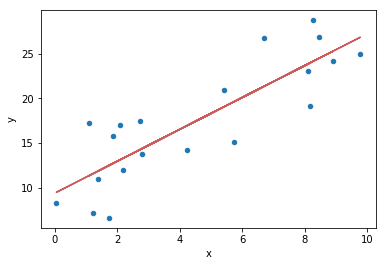

In [64]:
ax = df_.plot(x='x', y='y', kind='scatter')
ax.plot(df_.x, lineModel.fittedvalues, color='IndianRed')
#ax.plot(df_.x, quadraticModel.fittedvalues, color='DarkOrange')

Signal to Noise Ratio:

$\dfrac{N}{\sqrt{N}}$

Scatter Matrix

Log-Log Plot